# Covid19 Analysis

In [109]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
# sns.set(rc={'figure.figsize':(15, 8)})
plt.rcParams["figure.figsize"] = (15,8)

In [110]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [111]:
rFact = 7

# Statewise analysis

In [112]:
response = requests.get("https://api.covid19india.org/v4/min/timeseries.min.json")
data = response.json()
print(response.status_code)

200


In [113]:
# print(data['TN']['dates'].keys())

In [114]:
data['TN']['dates']['2021-05-24'].keys()

dict_keys(['delta', 'delta7', 'total'])

In [115]:
data['TN']['dates']['2021-05-24']['delta']

{'confirmed': 34867,
 'deceased': 404,
 'recovered': 27026,
 'tested': 168194,
 'vaccinated1': 78710,
 'vaccinated2': 3917}

In [116]:
def getDataStVt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['vaccinated']
    except:
#         print(date)
        return 0
getDataStVt(data, '2021-05-24', 'TN')    

0

In [117]:
def getDataStCt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['confirmed']
    except:
#         print(date)
        return 0
getDataStCt(data, '2021-05-24', 'TN')    

34867

In [118]:
def getDataStDt(data, date, state):
    
    try:
        dat = data[state]['dates'][date]['delta']
        return dat['deceased']
    except:
        return 0
getDataStDt(data, '2021-05-24', 'TN')  

404

In [119]:
def getDataStCtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    return dat['confirmed']
getDataStCtot(data, '2021-05-24', 'TN')   

1877211

In [120]:
def getDataStDtot(data, date, state):
    dat = data[state]['dates'][date]['total']
    try:
        return dat['deceased']
    except:
        return 0
getDataStDtot(data, '2021-05-24', 'TN')  

20872

# Mortality

In [121]:
dates = list(data['TN']['dates'].keys())[-(90+rFact):]
# dates

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


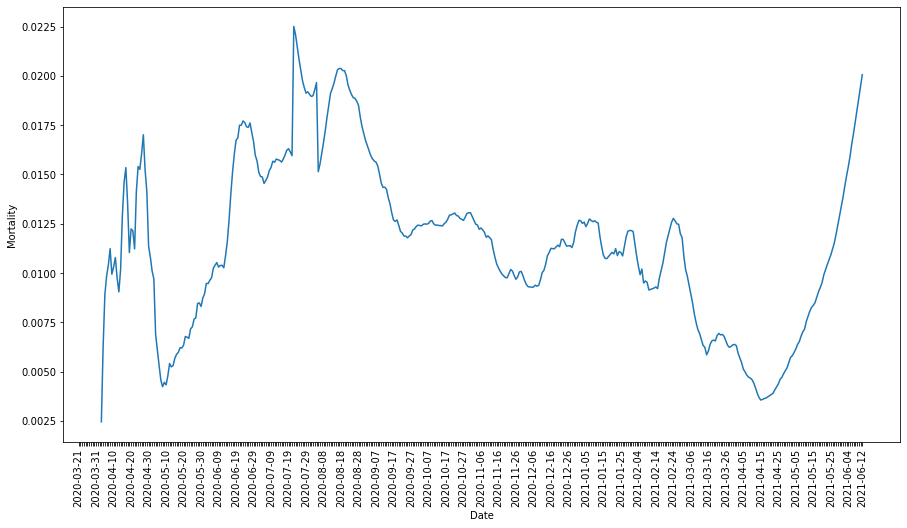

In [122]:
state = 'TN'
dates = list(data[state]['dates'].keys())[14:]
dect = [getDataStDt(data, d, state) for d in dates]
confct = [getDataStCt(data, d, state) for d in dates]
df = pd.DataFrame(list(zip(dates, dect, confct)),
           columns =['Date', 'deceased', 'Confirmed cases'])
df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
df['Mortality'] = df['ravgD'] / df['ravgC'] 
ax = sns.lineplot(x="Date", y='Mortality', data=df)
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-1:
        label.set_visible(True)
del(df)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Current mortality rate of  DL  is  1.727


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Current mortality rate of  MH  is  1.759
Current mortality rate of  UP  is  1.265


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Current mortality rate of  KA  is  1.183
Current mortality rate of  AP  is  0.657


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Current mortality rate of  KL  is  0.391
Current mortality rate of 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


 TN  is  1.229


(457, 457)

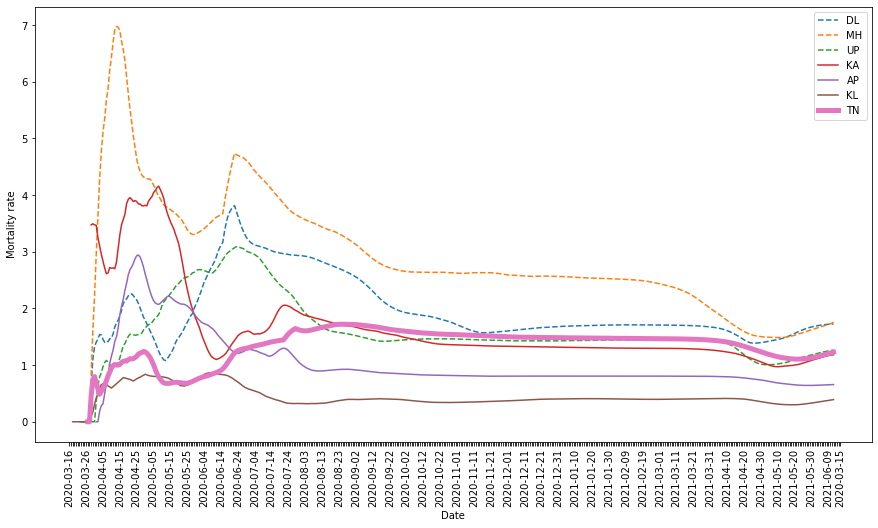

In [123]:
def martalityPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDtot(data, d, state) for d in dates]
    confct = [getDataStCtot(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 
    print('Current mortality rate of ', state , ' is ' ,round(df['Mortality rate'][-1:].to_list()[0], 3))
    ax = sns.lineplot(x="Date", y='Mortality rate', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[65:]



martalityPlot('DL', 1.5,'--')
martalityPlot('MH', 1.5,'--')
martalityPlot('UP', 1.5,'--')
martalityPlot('KA')
martalityPlot('AP')
martalityPlot('KL')
ax = martalityPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 59:
        label.set_visible(True)
ind, len(dates) +  59

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

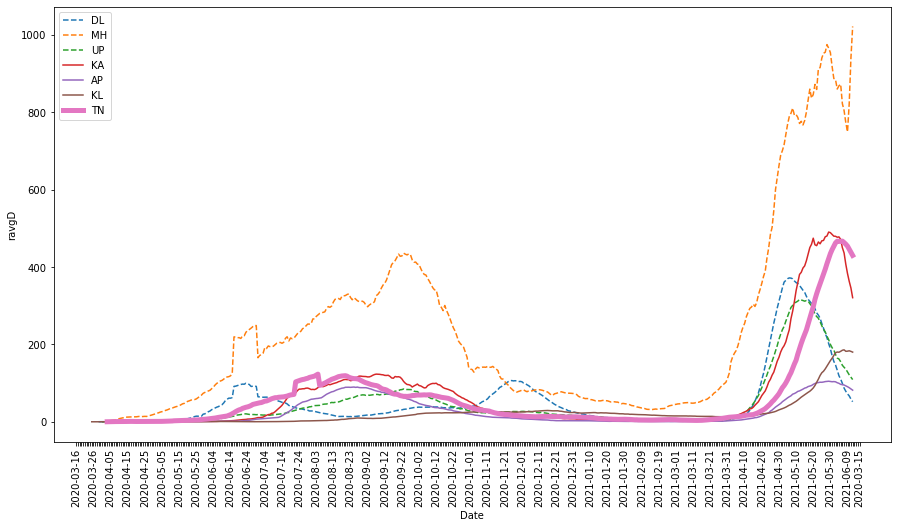

In [124]:
def martalityVPlot(state, linw = 1.5, linestyle='-'):
    dates = list(data[state]['dates'].keys())[14:]
    dect = [getDataStDt(data, d, state) for d in dates]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, dect, confct)),
               columns =['Date', 'deceased', 'Confirmed cases'])
    df['ravgD'] = df['deceased'].rolling(rFact+7).mean()
    df['ravgC'] = df['Confirmed cases'].rolling(rFact+7).mean()
    df['Mortality rate'] = 100*df['ravgD'] / df['ravgC'] 

    ax = sns.lineplot(x="Date", y='ravgD', data=df, label = state, linewidth = linw, linestyle = linestyle)
    plt.xticks(rotation=90)

    return ax
dates = list(data['TN']['dates'].keys())[100:]



martalityVPlot('DL', 1.5,'--')
martalityVPlot('MH', 1.5,'--')
martalityVPlot('UP', 1.5,'--')
martalityVPlot('KA')
martalityVPlot('AP')
martalityVPlot('KL')
ax = martalityVPlot('TN', 5)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)+ 94:
        label.set_visible(True)


# Confirmed cases

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


,Date,Confirmed cases
0,2020-03-21,3
1,2020-03-22,3
2,2020-03-23,3
3,2020-03-24,6
4,2020-03-25,8
...,...,...
444,2021-06-08,18023
445,2021-06-09,17321
446,2021-06-10,16813
447,2021-06-11,15759


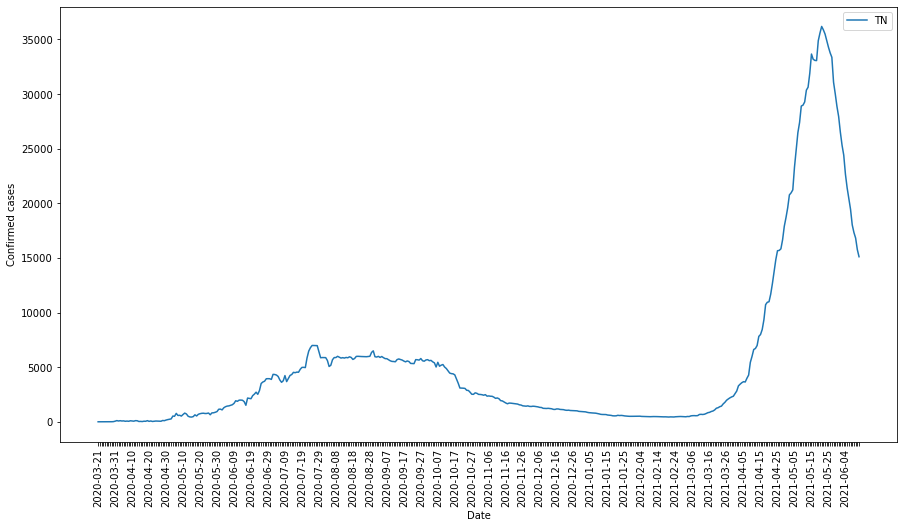

In [125]:
def statePlot(state):
    dates = list(data['TN']['dates'].keys())[14:]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    ax = sns.lineplot(x="Date", y='Confirmed cases', data=df, label = state)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    plt.xticks(rotation=90)
    return df
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
statePlot(state)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

(391, 398)

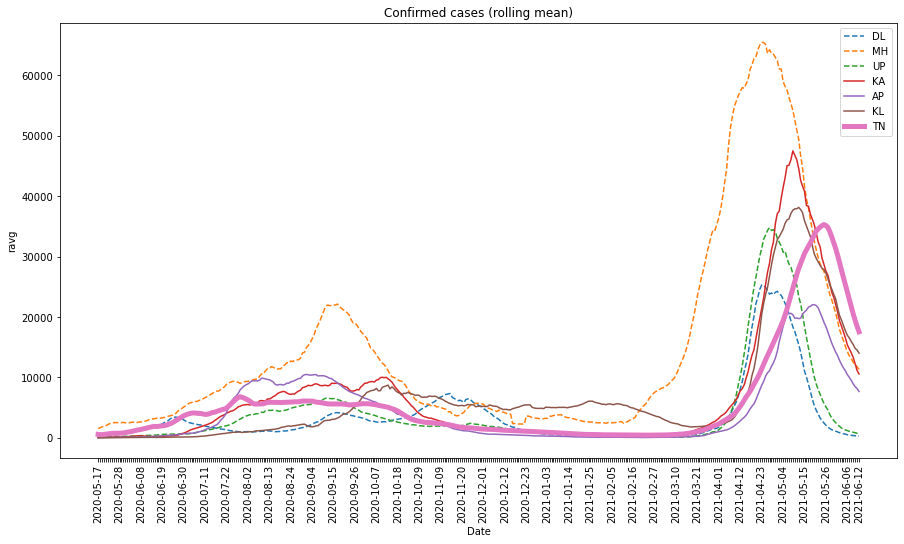

In [126]:
def stateRavgPlot(state, linw = 1.5, linestyle='-'):
    
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg', label = state, linewidth = linw, linestyle = linestyle)


    
    plt.xticks(rotation=90)
    return ax, df
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
dates = list(data['TN']['dates'].keys())[65:]


stateRavgPlot('DL', 1.5,'--')
stateRavgPlot('MH', 1.5,'--')
stateRavgPlot('UP', 1.5,'--')
stateRavgPlot('KA')
stateRavgPlot('AP')
stateRavgPlot('KL')
ax, df = stateRavgPlot('TN', 5)
plt.title('Confirmed cases (rolling mean)')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 11 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
ind, len(dates) 

In [127]:
np.floor(df[-1:].ravg.to_list()[0] - df[:200].ravg.max())

10753.0

In [133]:
df[30:170].ravg.mean()

4865.748979591835

In [134]:
df[-10:]

,Date,Confirmed cases,ravg
388,2021-06-03,24405,27732.857143
389,2021-06-04,22651,26528.857143
390,2021-06-05,21410,25299.428571
391,2021-06-06,20421,24093.285714
392,2021-06-07,19448,22880.714286
393,2021-06-08,18023,21667.857143
394,2021-06-09,17321,20525.571429
395,2021-06-10,16813,19441.000000
396,2021-06-11,15759,18456.428571
397,2021-06-12,15108,17556.142857


# Vaccination

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


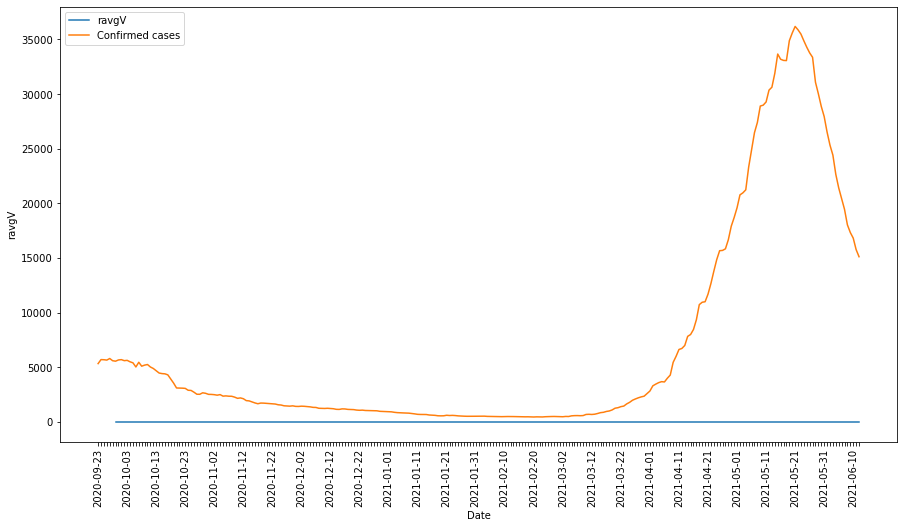

In [135]:
def stateVtPlot(state):
    dates = list(data['TN']['dates'].keys())[200:]
    vct = [getDataStVt(data, d, state) for d in dates]
    confct = [getDataStCt(data, d, state) for d in dates]
    df = pd.DataFrame(list(zip(dates, vct, confct)),
               columns =['Date', 'Vaccination', 'Confirmed cases'])
    df['ravgV'] = df['Vaccination'].rolling(7).mean()
    ax = sns.lineplot(x="Date", y='ravgV', data=df, label = 'ravgV')
    ax = sns.lineplot(x="Date", y='Confirmed cases', data=df, label = 'Confirmed cases')
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
state = 'TN'
stateVtPlot(state)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


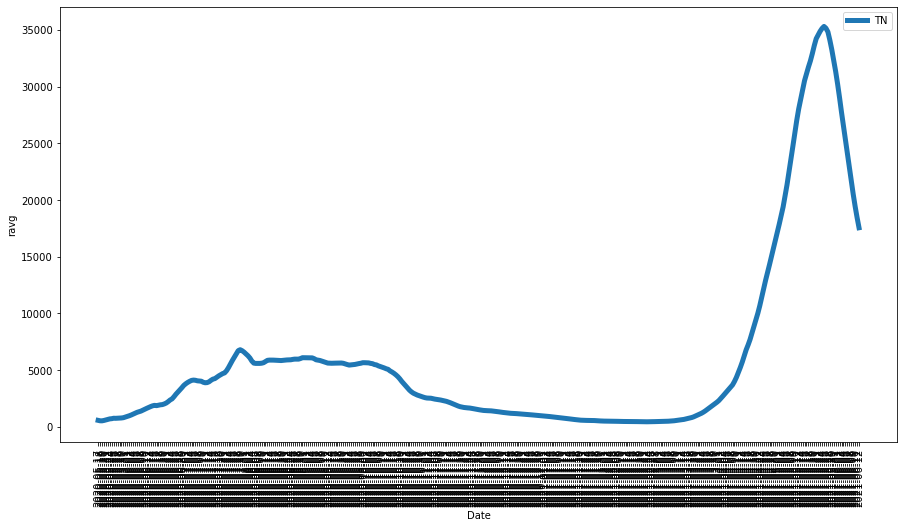

In [136]:
ax, df = stateRavgPlot('TN', 5)

In [137]:
df

,Date,Confirmed cases,ravg
6,2020-05-17,639,574.285714
7,2020-05-18,536,536.857143
8,2020-05-19,688,532.857143
9,2020-05-20,743,566.285714
10,2020-05-21,776,613.285714
...,...,...,...
393,2021-06-08,18023,21667.857143
394,2021-06-09,17321,20525.571429
395,2021-06-10,16813,19441.000000
396,2021-06-11,15759,18456.428571


In [138]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


Text(0.5, 0, 'DAte')

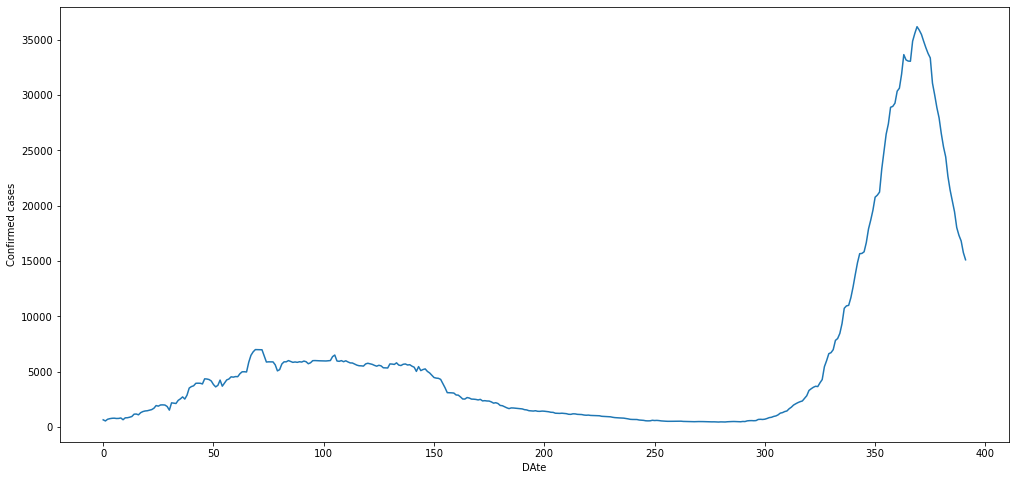

In [139]:
data = df#[:-1]
data = data.reset_index(drop=True)

plt.figure(figsize=(17, 8))
plt.plot(data['Confirmed cases'])

plt.ylabel('Confirmed cases')
plt.xlabel('DAte')

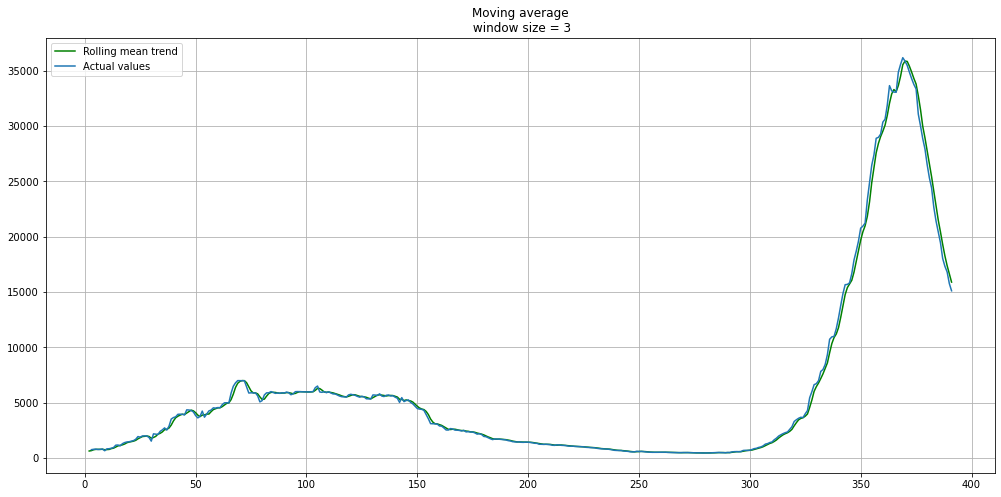

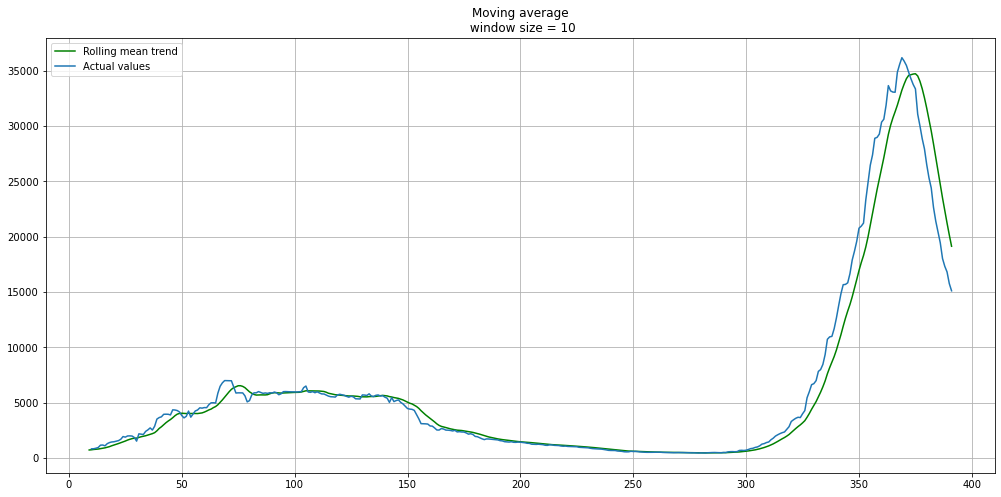

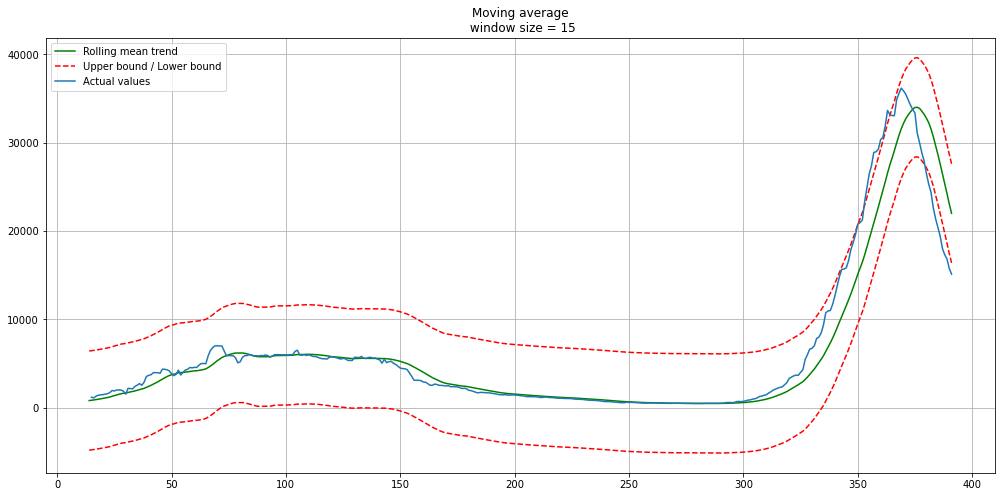

In [140]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data['Confirmed cases'], 3)

#Smooth by the previous month (30 days)
plot_moving_average(data['Confirmed cases'], 10)

#Smooth by previous quarter (90 days)
plot_moving_average(data['Confirmed cases'], 15, plot_intervals=True)

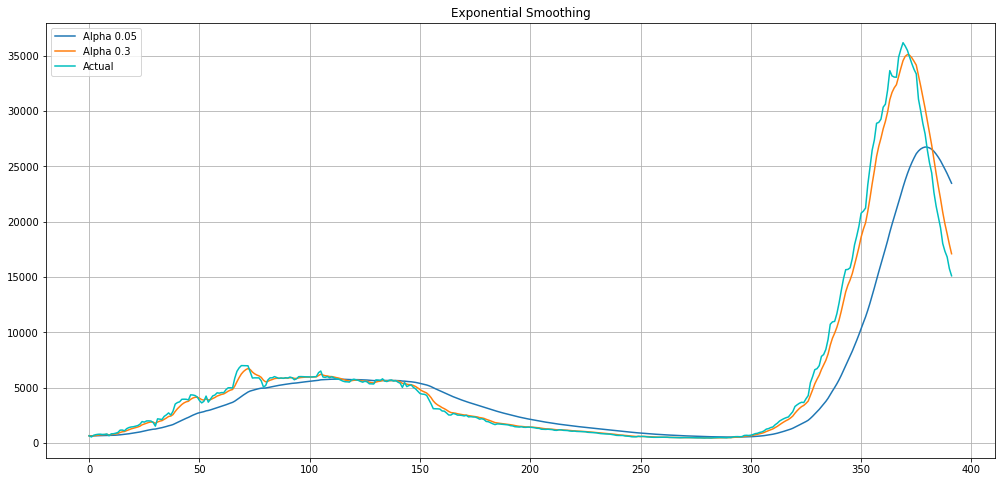

In [141]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(data['Confirmed cases'], [0.05, 0.3])

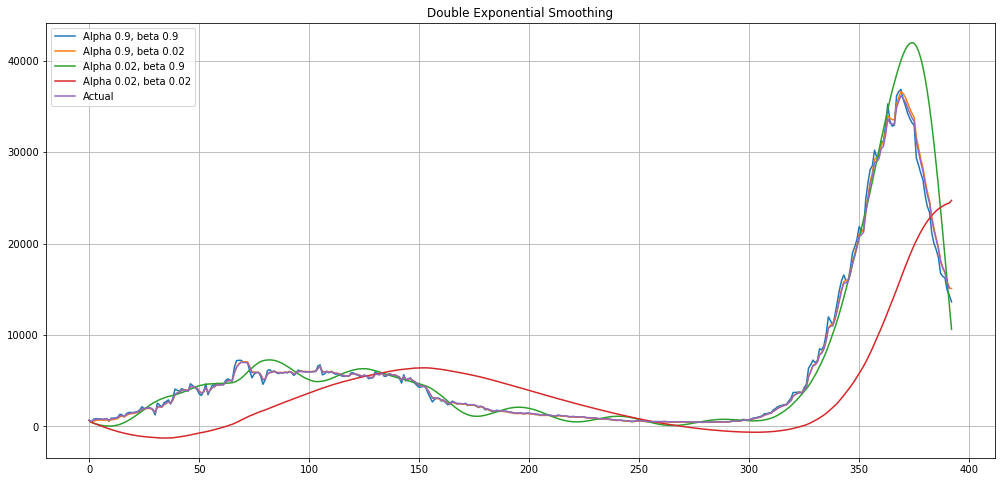

In [142]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data['Confirmed cases'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

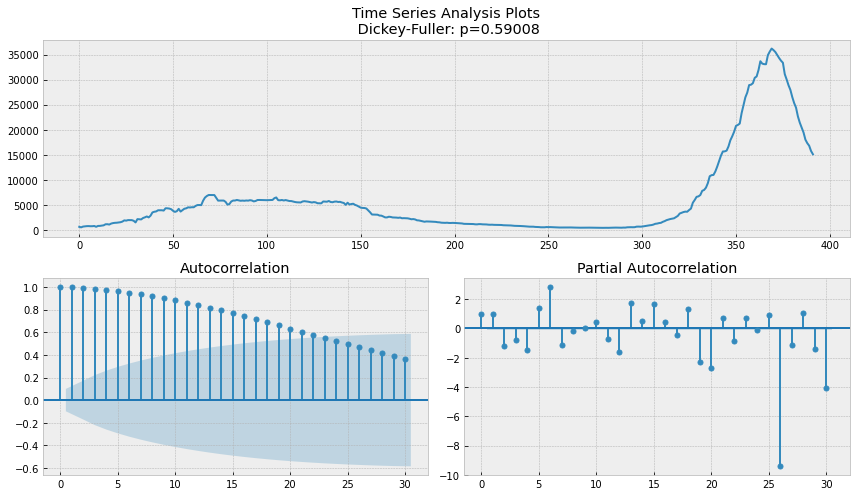

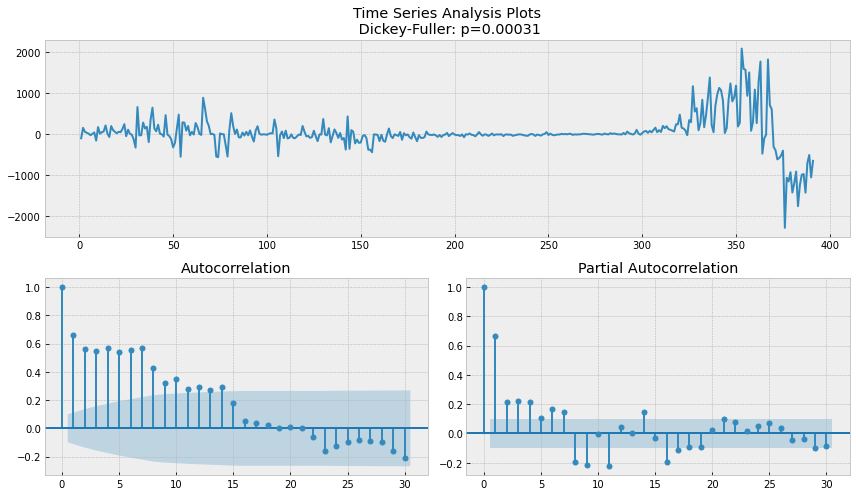

In [143]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data['Confirmed cases'], lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data['Confirmed cases'] - data['Confirmed cases'].shift(1)

tsplot(data_diff[1:], lags=30)

In [144]:
# Import Prophet
from fbprophet import Prophet
import logging

In [145]:
logging.getLogger().setLevel(logging.ERROR)
data

,Date,Confirmed cases,ravg
0,2020-05-17,639,574.285714
1,2020-05-18,536,536.857143
2,2020-05-19,688,532.857143
3,2020-05-20,743,566.285714
4,2020-05-21,776,613.285714
...,...,...,...
387,2021-06-08,18023,21667.857143
388,2021-06-09,17321,20525.571429
389,2021-06-10,16813,19441.000000
390,2021-06-11,15759,18456.428571


In [146]:
data['Date'] = pd.to_datetime(data['Date'])
datan = data[['Date', 'Confirmed cases']]
for col in datan.iloc[:,2:].columns:
    if datan[col].dtypes == object:
        datan[col] = datan[col].str.replace(',', '.').astype('float')
datan

,Date,Confirmed cases
0,2020-05-17,639
1,2020-05-18,536
2,2020-05-19,688
3,2020-05-20,743
4,2020-05-21,776
...,...,...
387,2021-06-08,18023
388,2021-06-09,17321
389,2021-06-10,16813
390,2021-06-11,15759


In [147]:
# Compute the average considering only the positive values
def positive_average(num):
    return num[num > -200].mean()

In [148]:
datan[datan['Confirmed cases']<0]


,Date,Confirmed cases


In [149]:
datan.dtypes

Date               datetime64[ns]
Confirmed cases             int64
dtype: object

In [150]:
datan.describe()

,Confirmed cases
count,392.000000
mean,5941.632653
std,8314.654757
min,438.000000
25%,1033.000000
50%,2841.000000
75%,5870.250000
max,36184.000000


In [151]:
datan = datan.dropna()

In [152]:
datan['Date']  =  pd.to_datetime(data['Date'])
datan['Confirmed cases'] = datan['Confirmed cases'].astype('float')

In [153]:
datan.dtypes

Date               datetime64[ns]
Confirmed cases           float64
dtype: object

In [154]:
df = datan[['Date', 'Confirmed cases']]#.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2020-05-17,639.0
1,2020-05-18,536.0
2,2020-05-19,688.0
3,2020-05-20,743.0
4,2020-05-21,776.0


In [155]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [163]:

# Initialize and train a model
prediction_size = 120
train_df = df#df[:-prediction_size]
m = Prophet(yearly_seasonality=True, weekly_seasonality=True)#weekly_seasonality=True,yearly_seasonality=True
m.fit(train_df)
# future = m.make_future_dataframe(periods=365)
# future.tail()
# m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


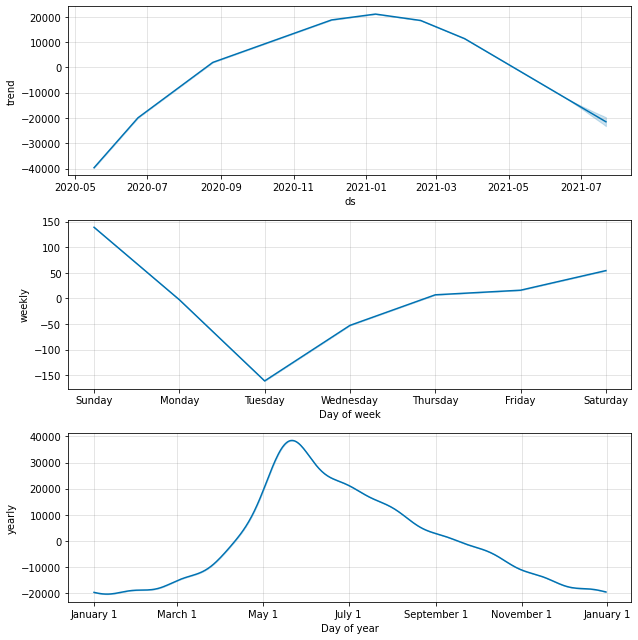

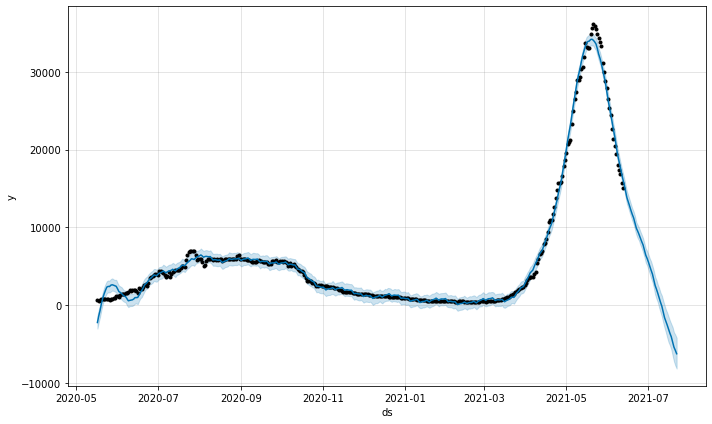

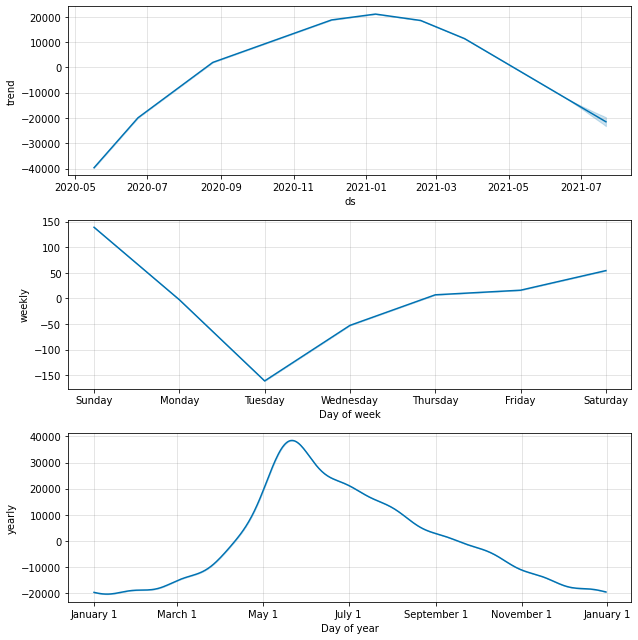

In [157]:
# prediction_size = 40
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

# Plot forecast
m.plot(forecast)

# Plot forecast's components
m.plot_components(forecast)

In [158]:
# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-05-17,-2226.850094,-3014.229405,-1339.510885,639.0
2020-05-18,-1380.072881,-2180.242280,-571.816228,536.0
2020-05-19,-665.119157,-1464.908959,117.561143,688.0
2020-05-20,201.501970,-572.522665,983.682181,743.0
2020-05-21,905.604899,154.504545,1667.850826,776.0


In [159]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


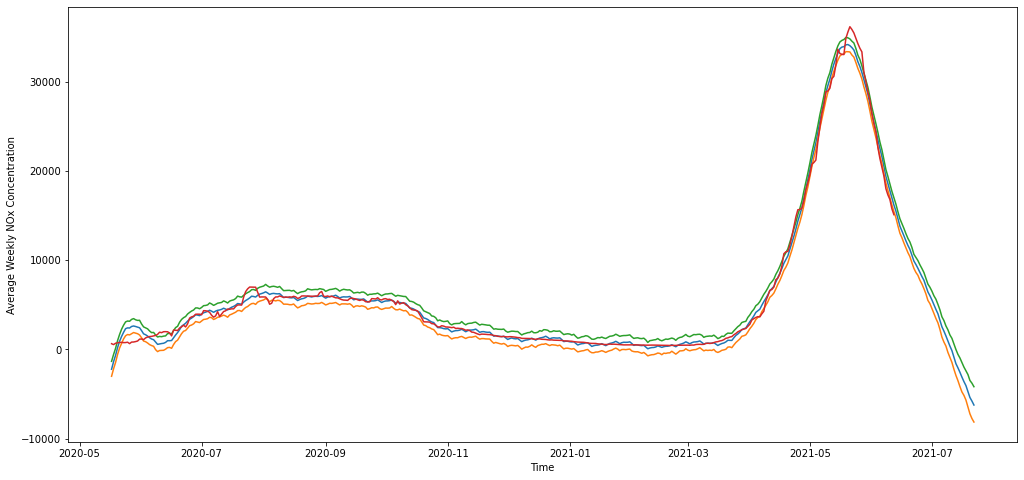

In [160]:
# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
# plt.show()

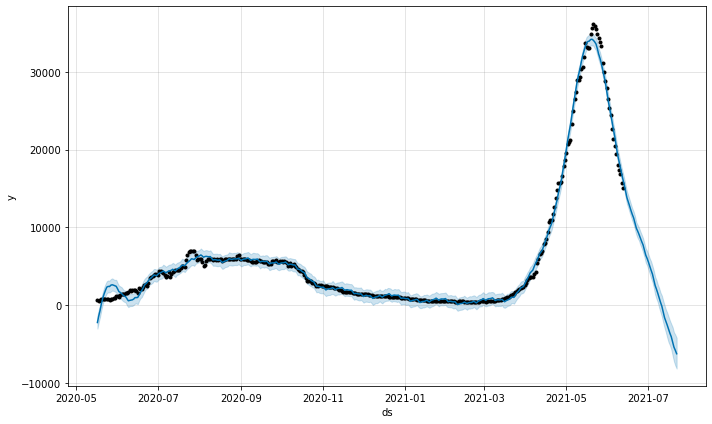

In [161]:
fig1 = m.plot(forecast)

In [69]:
data.keys()

Index(['Date', 'Confirmed cases', 'ravg'], dtype='object')

In [72]:
# print(data['TN']['dates']['2021-05-24'])

# Districtwise Analysis

In [164]:
response = requests.get("https://api.covid19india.org/v4/min/data-all.min.json")
data = response.json()
print(response.status_code)

200


In [165]:
# print(data.keys())

In [166]:
print(data['2021-05-24'].keys())

dict_keys(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UP', 'UT', 'WB'])


In [167]:
print(data['2021-05-24']['TN']['districts'].keys())

dict_keys(['Airport Quarantine', 'Ariyalur', 'Chengalpattu', 'Chennai', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kallakurichi', 'Kancheepuram', 'Kanyakumari', 'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal', 'Nilgiris', 'Perambalur', 'Pudukkottai', 'Railway Quarantine', 'Ramanathapuram', 'Ranipet', 'Salem', 'Sivaganga', 'Tenkasi', 'Thanjavur', 'Theni', 'Thiruvallur', 'Thiruvarur', 'Thoothukkudi', 'Tiruchirappalli', 'Tirunelveli', 'Tirupathur', 'Tiruppur', 'Tiruvannamalai', 'Vellore', 'Viluppuram', 'Virudhunagar'])


In [168]:
print(data['2021-05-24']['TN']['districts']['Chennai'].keys())

dict_keys(['delta', 'delta21_14', 'delta7', 'meta', 'total'])


In [169]:
print(data['2021-05-24']['TN']['districts']['Chennai']['delta'])

{'confirmed': 5047, 'deceased': 81, 'recovered': 5870, 'vaccinated1': 20582, 'vaccinated2': 1208}


In [170]:
print(data['2021-05-24']['TN']['districts']['Chennai']['meta'])

{'population': 7100000, 'tested': {'date': '2021-02-01'}}


In [171]:
print(data['2021-05-24']['TN']['districts']['Chennai']['total'])

{'confirmed': 483757, 'deceased': 6460, 'recovered': 429146, 'tested': 2667777, 'vaccinated1': 1299974, 'vaccinated2': 549632}


In [172]:
def getDataDt(data, date, district):
#     print(date)
    dat = data[date]['TN']['districts'][district]['delta']
#     print(dat)
    try:
        return dat['deceased']
    except:
        return 0
getDataDt(data, '2021-05-24', 'Chennai')

# [getDataDt(data, d, district) for d in dates]

81

In [173]:
def getDataCt(data, date, district):
    dat = data[date]['TN']['districts'][district]['delta']
    return dat['confirmed']
getDataCt(data, '2021-05-24', 'Chennai')
    

5047

In [174]:
dates[-1]
getDataCt(data, dates[-2], 'Chennai')

1071

In [175]:
district = 'Chennai'
dates = list(data.keys())[108:-1]
confct = [getDataCt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct)),
               columns =['Date', 'Confirmed cases'])
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
df = df[6:]
df

,Date,Confirmed cases,ravg
6,2020-06-20,1314,1313.857143
7,2020-06-21,1531,1325.142857
8,2020-06-22,1580,1358.285714
9,2020-06-23,1453,1422.857143
10,2020-06-24,1609,1465.428571
...,...,...,...
359,2021-06-08,1412,1805.285714
360,2021-06-09,1303,1663.285714
361,2021-06-10,1175,1542.000000
362,2021-06-11,1071,1413.428571


In [186]:
dates = list(data.keys())[-(100+rFact):-1]
confct = [getDataCt(data, d, district) for d in dates]
Dect = [getDataDt(data, d, district) for d in dates]
df = pd.DataFrame(list(zip(dates, confct, Dect)),
               columns =['Date', 'Confirmed cases', 'deceased'])
df['ravgD'] = df['deceased'].rolling(rFact).mean()
df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()

df = df[6:]
df

,Date,Confirmed cases,deceased,ravgD,ravg
6,2021-03-05,51,0,0.000000,44.142857
7,2021-03-06,48,1,0.142857,45.285714
8,2021-03-07,49,0,0.142857,46.285714
9,2021-03-08,48,1,0.285714,46.857143
10,2021-03-09,55,0,0.285714,49.142857
...,...,...,...,...,...
101,2021-06-08,2444,44,38.428571,2742.142857
102,2021-06-09,2325,62,41.857143,2636.000000
103,2021-06-10,2239,20,37.714286,2529.000000
104,2021-06-11,2059,31,37.714286,2421.714286


,Date,Confirmed cases
0,2021-02-27,181
1,2021-02-28,182
2,2021-03-01,189
3,2021-03-02,167
4,2021-03-03,184
...,...,...
101,2021-06-08,1412
102,2021-06-09,1303
103,2021-06-10,1175
104,2021-06-11,1071


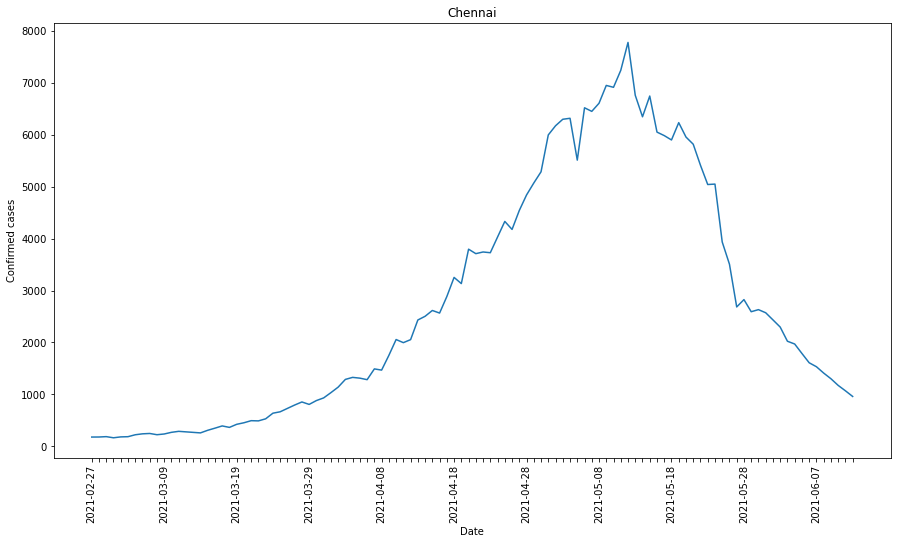

In [187]:

def districtPlot(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y="Confirmed cases")
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
districtPlot(district)

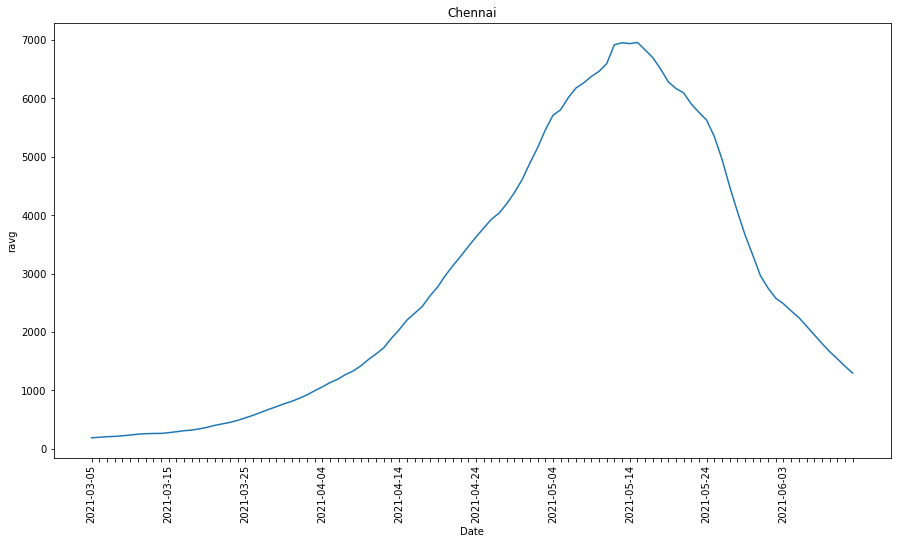

In [188]:

def districtPlotRavg(district):
    confct = [getDataCt(data, d, district) for d in dates]

    df = pd.DataFrame(list(zip(dates, confct)),
                   columns =['Date', 'Confirmed cases'])

    df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
    df = df[6:]
#     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

    ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.title(district)
    plt.xticks(rotation=90)
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(dates,confct)
    return df
district = 'Chennai'
df1 = districtPlotRavg(district)

In [189]:

# def districtPlotRavgD(district):
#     confct = [getDataCt(data, d, district) for d in dates]

#     Dect = [getDataDt(data, d, district) for d in dates]
#     df = pd.DataFrame(list(zip(dates, confct, Dect)),
#                    columns =['Date', 'Confirmed cases', 'deceased'])
#     df['ravgD'] = df['deceased'].rolling(rFact).mean()
#     df['ravg'] = df['Confirmed cases'].rolling(rFact).mean()
    
#     df = df[6:]
# #     ax = sns.barplot(x="Date", y='Confirmed cases', data=df)

# #     ax = sns.lineplot(data=df, x="Date", y='ravg')
#     ax = sns.lineplot(data=df, x="Date", y='ravgD')
#     for ind, label in enumerate(ax.get_xticklabels()):
#         if ind % 10 == 0:  # every 10th label is kept
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
#     plt.title(district)
#     plt.xticks(rotation=90)
# #     fig = plt.figure()
# #     ax = fig.add_axes([0,0,1,1])
# #     ax.bar(dates,confct)
#     return df
# district = 'Chennai'
# dfD1 = districtPlotRavgD(district)

,Date,Confirmed cases
0,2021-02-27,40
1,2021-02-28,42
2,2021-03-01,44
3,2021-03-02,39
4,2021-03-03,45
...,...,...
101,2021-06-08,2444
102,2021-06-09,2325
103,2021-06-10,2239
104,2021-06-11,2059


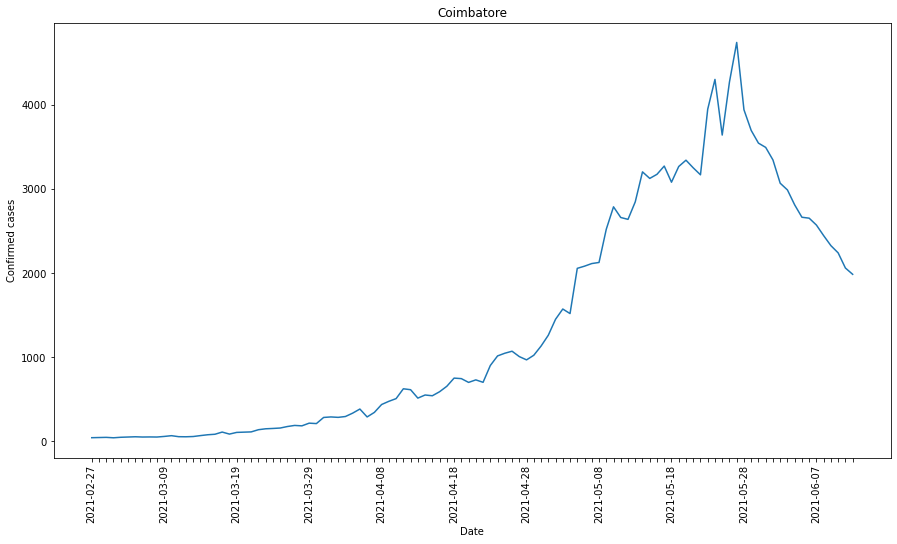

In [190]:
# dates = list(data.keys())[108:-1]
district = 'Coimbatore'
districtPlot(district)

In [191]:
# district = 'Coimbatore'
# dfD2 = districtPlotRavgD(district)

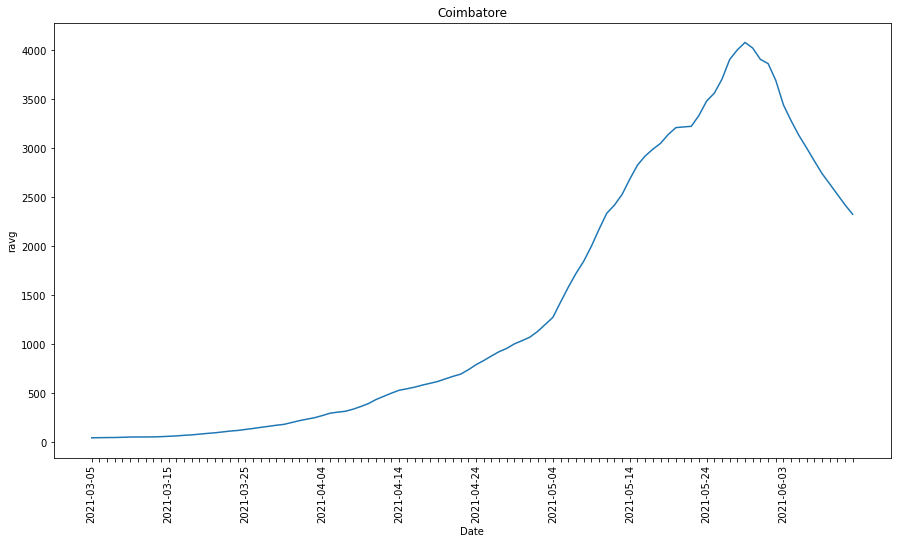

In [192]:
district = 'Coimbatore'
df2 = districtPlotRavg(district)

In [194]:
len(df2)

100

In [105]:
# district = 'Namakkal'
# districtPlot(district)

In [195]:
df1['ravg']

6       188.000000
7       196.857143
8       206.571429
9       211.857143
10      222.285714
          ...     
101    1805.285714
102    1663.285714
103    1542.000000
104    1413.428571
105    1295.285714
Name: ravg, Length: 100, dtype: float64

In [196]:
df2['ravg']

6        44.142857
7        45.285714
8        46.285714
9        46.857143
10       49.142857
          ...     
101    2742.142857
102    2636.000000
103    2529.000000
104    2421.714286
105    2324.714286
Name: ravg, Length: 100, dtype: float64

Text(0.5, 1.0, 'Chennai Vs Coimbatore')

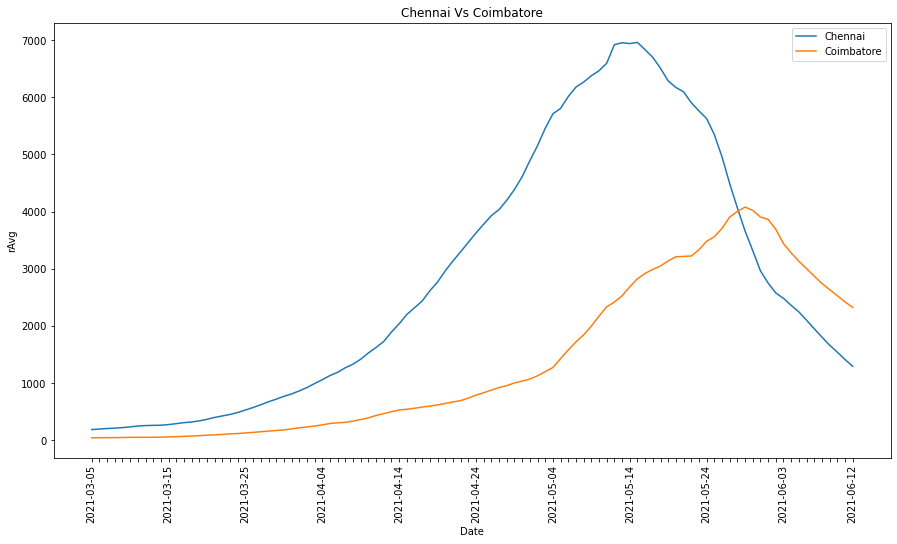

In [197]:
frame = {'Date':df1.Date, 'Chennai': df1['ravg'], 'Coimbatore': df2['ravg'] }
df = pd.DataFrame(frame)
ax = sns.lineplot(data=df, x="Date", y='Chennai', label = 'Chennai')
ax = sns.lineplot(data=df, x="Date", y='Coimbatore', label = 'Coimbatore')
plt.ylabel('rAvg')
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
    if ind == len(dates)-7:
        label.set_visible(True)
plt.title('Chennai Vs Coimbatore')